In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')

C:\Users\abhishek maurya\AppData\Local\Temp\ipykernel_19128\2815211952.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('train.csv')


In [3]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [5]:
data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
data[(data['Open'] == 0) & (data['Sales'] > 0)] 

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [7]:
data['Store'].unique

<bound method Series.unique of 0             1
1             2
2             3
3             4
4             5
           ... 
1017204    1111
1017205    1112
1017206    1113
1017207    1114
1017208    1115
Name: Store, Length: 1017209, dtype: int64>

In [8]:
pd.to_datetime(data['Date']).inplace=True

In [9]:
data.set_index('Date', inplace = True)

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

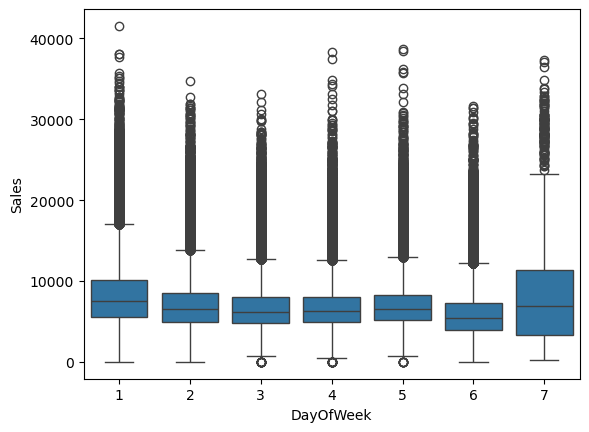

In [10]:
sns.boxplot(x='DayOfWeek', y='Sales', data=data[data['Open'] == 1])

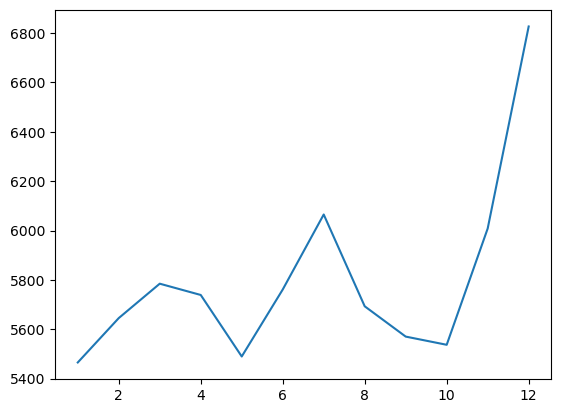

In [11]:
data.index = pd.to_datetime(data.index)
data['Month'] = data.index.month
monthly_sales = data.groupby('Month')['Sales'].mean()
plt.plot(monthly_sales)

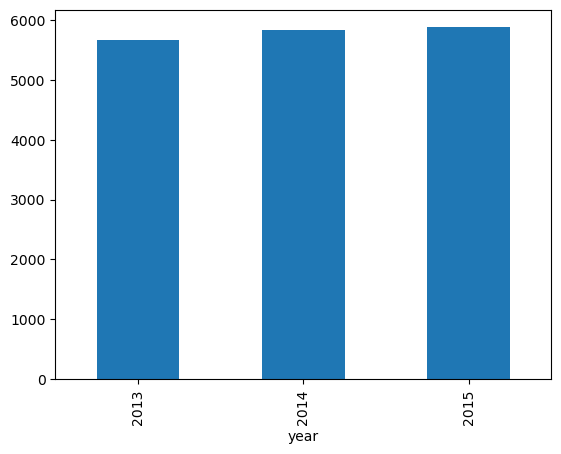

In [12]:
data['year'] = data.index.year
year_sales = data.groupby('year')['Sales'].mean().plot(kind='bar')
# plt.plot(year_sales)

In [13]:
promo_sales = data.groupby('Promo')['Sales'].mean()
print(f'promo days sales: {promo_sales[1]:.0f} vs Non-Promo: {promo_sales[0]:.0f}')

promo days sales: 7991 vs Non-Promo: 4406


In [14]:
data.groupby(['Promo', 'SchoolHoliday'])['Sales'].mean().unstack()

SchoolHoliday,0,1
Promo,,
0,4237.208836,5303.505215
1,8015.661518,7899.810066


In [15]:
data.groupby('Store')['Sales'].mean().sort_values(ascending=False).head()

Store
262     20718.515924
817     18108.139066
562     17969.556263
1114    17200.196391
251     15814.087049
Name: Sales, dtype: float64

(array([  9.,  18.,  37.,  44.,  87., 106.,  90.,  98.,  95., 108.,  88.,
         65.,  55.,  45.,  39.,  30.,  19.,  18.,  11.,   9.,   6.,   2.,
          4.,   7.,   3.,   4.,   1.,   3.,   2.,   1.,   0.,   1.,   1.,
          0.,   3.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,   2.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 2244.50318471,  2613.98343949,  2983.46369427,  3352.94394904,
         3722.42420382,  4091.9044586 ,  4461.38471338,  4830.86496815,
         5200.34522293,  5569.82547771,  5939.30573248,  6308.78598726,
         6678.26624204,  7047.74649682,  7417.22675159,  7786.70700637,
         8156.18726115,  8525.66751592,  8895.1477707 ,  9264.62802548,
         9634.10828025, 10003.58853503, 10373.06878981, 10742.54904459,
        11112.02929936, 11481.50955414, 11850.98980892, 12220.47006369,
        12589.95031847, 12959.43057325, 13328.91082803, 13698.3910828 ,
        14067.87133758, 14437.35159236, 14806.83184713, 15176.31210191,
        15

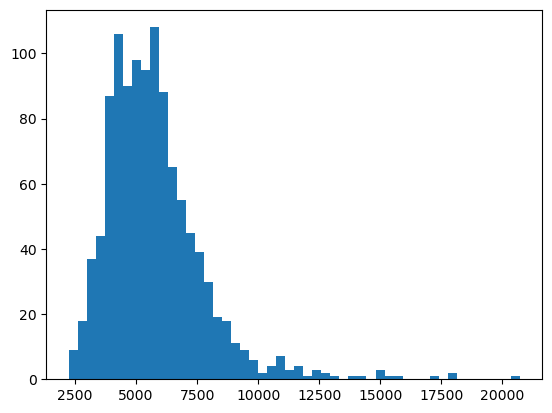

In [16]:
plt.hist(data.groupby('Store')['Sales'].mean(), bins=50)

C:\Users\abhishek maurya\AppData\Local\Temp\ipykernel_19128\693954412.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['StateHoliday'] = data['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 2, 'c': 3})


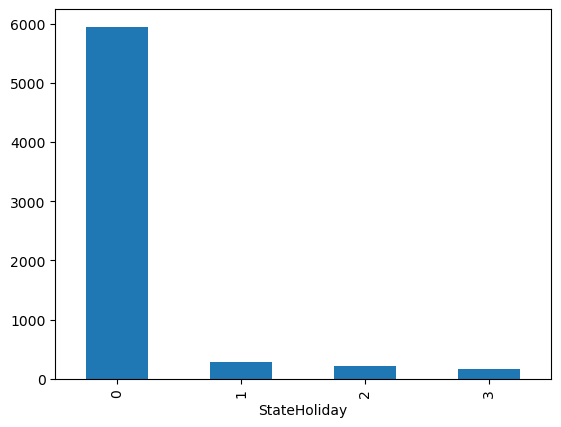

In [17]:
data['StateHoliday'] = data['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 2, 'c': 3})
holiday_sales = data.groupby('StateHoliday')['Sales'].mean().plot(kind='bar')


<Axes: xlabel='Customers', ylabel='Sales'>

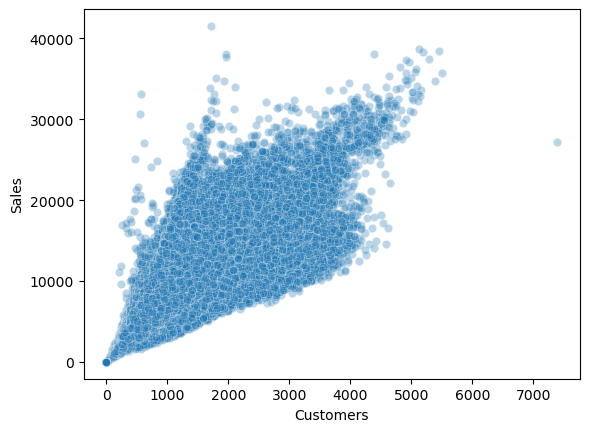

In [18]:
sns.scatterplot(x='Customers', y='Sales', data=data, alpha=0.3)

<Axes: >

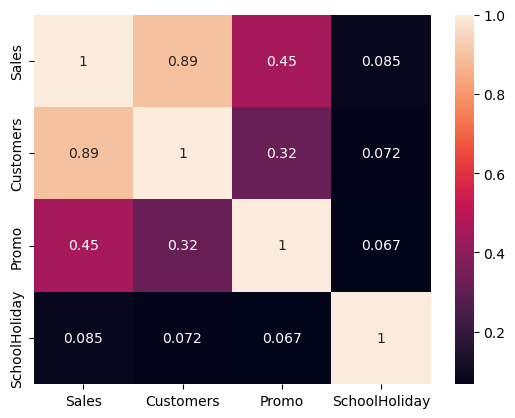

In [19]:
sns.heatmap(data[['Sales', 'Customers', 'Promo', 'SchoolHoliday']].corr(), annot=True)

In [20]:
data = data[data['Open'] == 1]
data = data.drop(columns=['Open'])

In [21]:
data.head()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Month,year
Date,,,,,,,,,
2015-07-31,1,5,5263,555,1,0,1,7,2015
2015-07-31,2,5,6064,625,1,0,1,7,2015
2015-07-31,3,5,8314,821,1,0,1,7,2015
2015-07-31,4,5,13995,1498,1,0,1,7,2015
2015-07-31,5,5,4822,559,1,0,1,7,2015


In [22]:
data = pd.get_dummies(data, columns=['StateHoliday'], prefix='Holiday_')
holiday_cols = [col for col in data.columns if col.startswith('Holiday_')]
data[holiday_cols] = data[holiday_cols].astype(int)


In [23]:
data.head()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,Month,year,Holiday__0,Holiday__1,Holiday__2,Holiday__3
Date,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,7,2015,1,0,0,0
2015-07-31,2,5,6064,625,1,1,7,2015,1,0,0,0
2015-07-31,3,5,8314,821,1,1,7,2015,1,0,0,0
2015-07-31,4,5,13995,1498,1,1,7,2015,1,0,0,0
2015-07-31,5,5,4822,559,1,1,7,2015,1,0,0,0


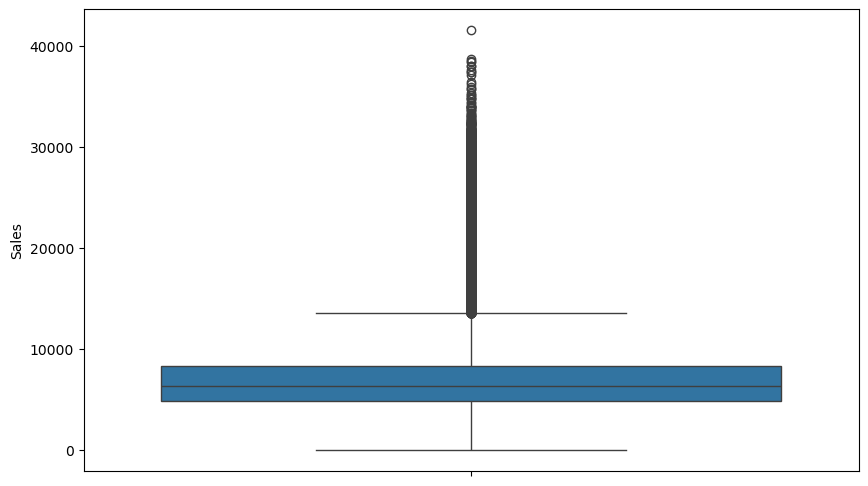

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(data['Sales'])
plt.show()

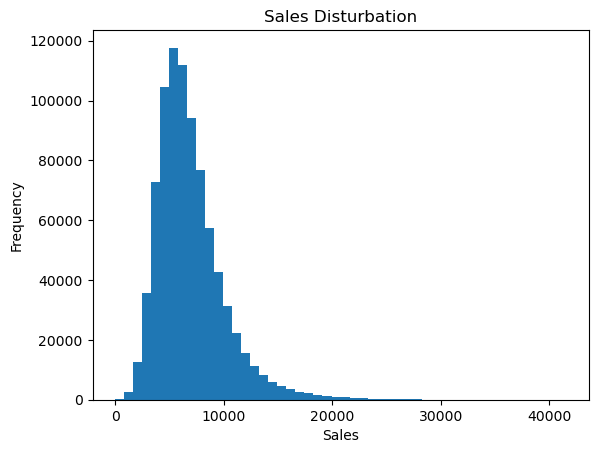

In [25]:
plt.hist(data['Sales'], bins=50)
plt.title('Sales Disturbation')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [26]:
from scipy.stats import skew

skewness = skew(data['Sales'])
print(f'Skewness: {skewness:.2f}')


Skewness: 1.59


In [27]:
q1 = data['Sales'].quantile(0.01)
q99 = data['Sales'].quantile(0.99)
data['Sales'] = data['Sales'].clip(lower=q1, upper=q99)

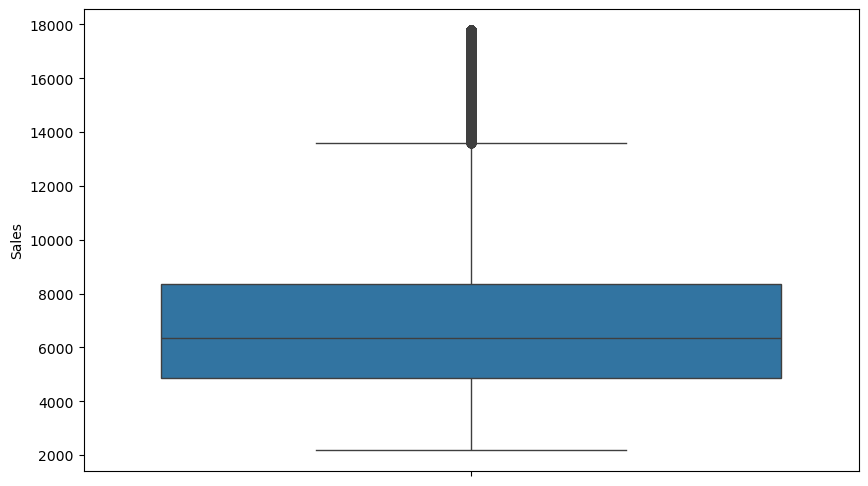

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(data['Sales'])
plt.show()

In [29]:
data['Sales'] = np.log1p(data['Sales'])

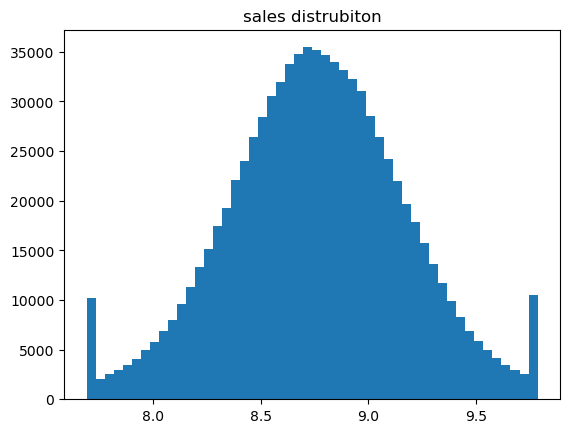

In [30]:
plt.hist(data['Sales'], bins=50)
plt.title('sales distrubiton')
plt.show()

In [31]:
data['Dayofmonth'] = data.index.day
data['IsWeekend'] = data['DayOfWeek'].isin([6, 7]).astype(int)
## isko pahele hi kar lena chaiye tha lekin jane do der hai durast aaye

In [32]:
print(data[data['Customers'] == 0].shape)  # Check if any open days have zero customers

(52, 14)


In [33]:
df = data.copy()


In [34]:
df = df.reset_index('Date')
df = df.drop(columns=['Customers'])  
df = df.sort_values(by=['Store', 'Date'])

In [35]:
df['Sales_Lag7'] = df.groupby('Store')['Sales'].shift(7)

store_avg = df.groupby('Store')['Sales'].transform('mean')
df['Sales_Lag7'] = df['Sales_Lag7'].fillna(store_avg)

df['Sales_RollingMean7'] = (
    df.groupby('Store')['Sales']
    .transform(lambda x: x.rolling(7, min_periods=3).mean()) 
)

df['Sales_RollingMean7'] = df.groupby('Store')['Sales_RollingMean7'].ffill()

In [36]:
df.head(8)

,Date,Store,DayOfWeek,Sales,Promo,SchoolHoliday,Month,year,Holiday__0,Holiday__1,Holiday__2,Holiday__3,Dayofmonth,IsWeekend,Sales_Lag7,Sales_RollingMean7
843264,2013-01-02,1,3,8.618124,0,1,1,2013,1,0,0,0,2,0,8.446708,NaN
842155,2013-01-03,1,4,8.372861,0,1,1,2013,1,0,0,0,3,0,8.446708,NaN
841047,2013-01-04,1,5,8.408940,0,1,1,2013,1,0,0,0,4,0,8.446708,8.466641
839940,2013-01-05,1,6,8.516793,0,1,1,2013,1,0,0,0,5,1,8.446708,8.479179
838815,2013-01-07,1,1,8.878637,1,1,1,2013,1,0,0,0,7,0,8.446708,8.559071
837710,2013-01-08,1,2,8.627123,1,1,1,2013,1,0,0,0,8,0,8.446708,8.570413
836605,2013-01-09,1,3,8.607399,1,1,1,2013,1,0,0,0,9,0,8.446708,8.575697
835500,2013-01-10,1,4,8.495561,1,1,1,2013,1,0,0,0,10,0,8.618124,8.558188


In [37]:
!pip install lightgbm

In [38]:
df1 = df.copy()

C:\Users\abhishek maurya\AppData\Local\Temp\ipykernel_19128\1787589031.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test = df.groupby('Store').apply(lambda x: x.nlargest(30, 'Date')).reset_index(drop=True)


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.153076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1682
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742
Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 0.134939	valid_0's l2: 0.0182085
[200]	valid_0's rmse: 0.124542	valid_0's l2: 0.0155106
[300]	valid_0's rmse: 0.120314	valid_0's l2: 0.0144754
[400]	valid_0's rmse: 0.117996	valid_0's l2: 0.0139232
[500]	valid_0's rmse: 0.115186	valid_0's l2: 0.0132678
[600]	valid_0's rmse: 0.11

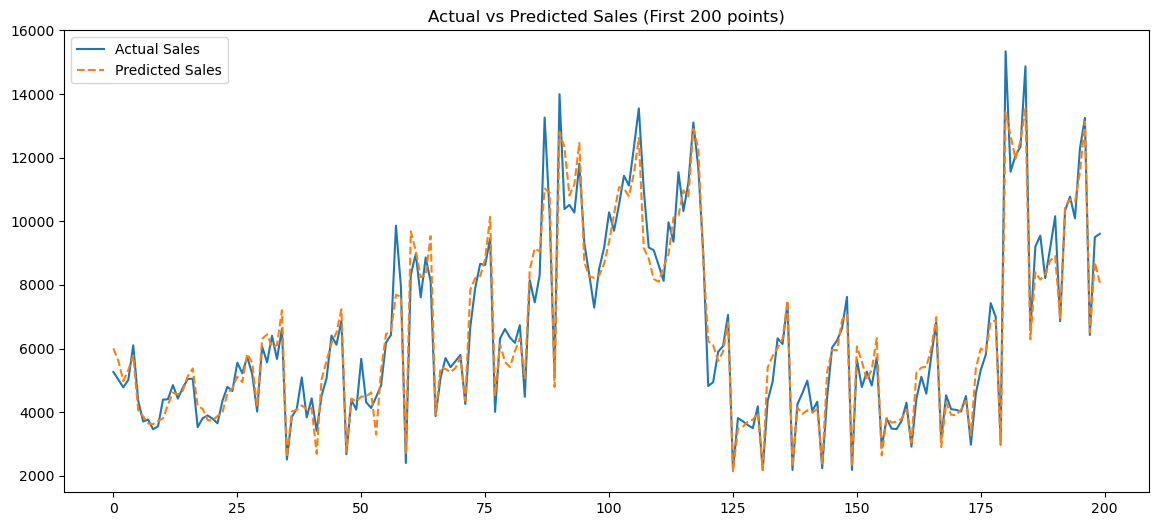

In [39]:
# Each Store ka Last 30 Days -> Test
test = df.groupby('Store').apply(lambda x: x.nlargest(30, 'Date')).reset_index(drop=True)
train = df[~df.index.isin(test.index)]


# Features and Target
X_train = train.drop(columns=['Sales', 'Date'])
y_train = train['Sales']

X_test = test.drop(columns=['Sales', 'Date'])
y_test = test['Sales']

import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import numpy as np

from lightgbm import early_stopping, log_evaluation

model = lgb.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.03,
    max_depth=8,
    random_state=42,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1
)

model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='rmse',
     categorical_feature=['Store'],
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=100)
    ]
)


# Predict
y_pred = model.predict(X_test)

# If you did log1p on Sales earlier, do expm1 here
y_test_actual = np.expm1(y_test)
y_pred_actual = np.expm1(y_pred)

# Evaluation
mse = mean_squared_error(y_test_actual, y_pred_actual)
print(f'Validation MSE: {mse:.2f}')

import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(y_test_actual.values[:200], label='Actual Sales')
plt.plot(y_pred_actual[:200], label='Predicted Sales', linestyle='--')
plt.title('Actual vs Predicted Sales (First 200 points)')
plt.legend()
plt.show()


In [40]:
# Lag Features (14, 30 days)
df1['Sales_Lag14'] = df1.groupby('Store')['Sales'].shift(14)
df1['Sales_Lag30'] = df1.groupby('Store')['Sales'].shift(30)

# Fill missing lag values with store's average sales
store_avg = df1.groupby('Store')['Sales'].transform('mean')
df1['Sales_Lag14'] = df1['Sales_Lag14'].fillna(store_avg)
df1['Sales_Lag30'] = df1['Sales_Lag30'].fillna(store_avg)

# Rolling Mean Features (14, 30 days)
df1['Sales_RollingMean14'] = (
    df.groupby('Store')['Sales']
    .transform(lambda x: x.rolling(14, min_periods=1).mean())  
)
df1['Sales_RollingMean30'] = (
    df.groupby('Store')['Sales']
    .transform(lambda x: x.rolling(30, min_periods=1).mean())  
)

# Forward fill missing rolling mean values
df1['Sales_RollingMean14'] = df1.groupby('Store')['Sales_RollingMean14'].ffill()
df1['Sales_RollingMean30'] = df1.groupby('Store')['Sales_RollingMean30'].ffill()


print(df1.head())


             Date  Store  DayOfWeek     Sales  Promo  SchoolHoliday  Month  \
843264 2013-01-02      1          3  8.618124      0              1      1   
842155 2013-01-03      1          4  8.372861      0              1      1   
841047 2013-01-04      1          5  8.408940      0              1      1   
839940 2013-01-05      1          6  8.516793      0              1      1   
838815 2013-01-07      1          1  8.878637      1              1      1   

        year  Holiday__0  Holiday__1  Holiday__2  Holiday__3  Dayofmonth  \
843264  2013           1           0           0           0           2   
842155  2013           1           0           0           0           3   
841047  2013           1           0           0           0           4   
839940  2013           1           0           0           0           5   
838815  2013           1           0           0           0           7   

        IsWeekend  Sales_Lag7  Sales_RollingMean7  Sales_Lag14  Sales_Lag3

In [41]:
!pip install optuna


In [42]:
import optuna
from lightgbm import LGBMRegressor, early_stopping
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def objective(trial):
    # Hyperparameters to tune
    param = {
        'objective': 'regression',
        'metric': 'rmse',
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 4, 12),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 0.1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 0.1),
    }

    # Train the model
    model = LGBMRegressor(**param)
    model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        callbacks=[early_stopping(stopping_rounds=50, verbose=False)]
    )

    # Predict and calculate RMSE
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)


[I 2025-04-27 23:09:08,603] A new study created in memory with name: no-name-b8a017be-5ac2-4673-8c00-8b5ce37f9e98


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.147501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:09:31,852] Trial 0 finished with value: 0.1466175536195676 and parameters: {'n_estimators': 249, 'learning_rate': 0.0342790377687476, 'max_depth': 8, 'subsample': 0.7236094797796374, 'colsample_bytree': 0.7378189211898308, 'reg_alpha': 0.09905497964280974, 'reg_lambda': 0.010896762785680534}. Best is trial 0 with value: 0.1466175536195676.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.108560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:09:42,815] Trial 1 finished with value: 0.14536843327215065 and parameters: {'n_estimators': 197, 'learning_rate': 0.044273151192290014, 'max_depth': 12, 'subsample': 0.78511245445268, 'colsample_bytree': 0.8678269831812958, 'reg_alpha': 0.02406354616477568, 'reg_lambda': 0.08550669981260499}. Best is trial 1 with value: 0.14536843327215065.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.110326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:10:07,381] Trial 2 finished with value: 0.14546495354532982 and parameters: {'n_estimators': 269, 'learning_rate': 0.02539881632806057, 'max_depth': 12, 'subsample': 0.8241182172508461, 'colsample_bytree': 0.8687185539428062, 'reg_alpha': 0.07974590539773435, 'reg_lambda': 0.08955893567018879}. Best is trial 1 with value: 0.14536843327215065.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.100142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:10:37,978] Trial 3 finished with value: 0.13925196666712863 and parameters: {'n_estimators': 517, 'learning_rate': 0.04577000468390908, 'max_depth': 11, 'subsample': 0.9717427863569592, 'colsample_bytree': 0.8580461977946193, 'reg_alpha': 0.03107027598939096, 'reg_lambda': 0.020755596772337973}. Best is trial 3 with value: 0.13925196666712863.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.084259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-04-27 23:11:29,610] Trial 4 finished with value: 0.14470023451723385 and parameters: {'n_estimators': 779, 'learning_rate': 0.016343222543085567, 'max_depth': 5, 'subsample': 0.858075728361638, 'colsample_bytree': 0.7280790845312934, 'reg_alpha': 0.024732535970234115, 'reg_lambda': 0.09042522127721843}. Best is trial 3 with value: 0.13925196666712863.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.092001 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:12:04,204] Trial 5 finished with value: 0.13443431834512537 and parameters: {'n_estimators': 664, 'learning_rate': 0.05922125451892785, 'max_depth': 12, 'subsample': 0.8329067257895548, 'colsample_bytree': 0.95211581391292, 'reg_alpha': 0.046169838318071074, 'reg_lambda': 0.01018050855937665}. Best is trial 5 with value: 0.13443431834512537.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-04-27 23:12:42,475] Trial 6 finished with value: 0.15023672489610715 and parameters: {'n_estimators': 813, 'learning_rate': 0.012879898072606828, 'max_depth': 4, 'subsample': 0.8395977416921865, 'colsample_bytree': 0.7221336568771751, 'reg_alpha': 0.014160368862809983, 'reg_lambda': 0.05040561828915005}. Best is trial 5 with value: 0.13443431834512537.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.136431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:13:13,411] Trial 7 finished with value: 0.13618945017575304 and parameters: {'n_estimators': 581, 'learning_rate': 0.08436865858044444, 'max_depth': 7, 'subsample': 0.7877369280870341, 'colsample_bytree': 0.8963378525402957, 'reg_alpha': 0.04077668753311177, 'reg_lambda': 0.04264055610853683}. Best is trial 5 with value: 0.13443431834512537.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.108942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:13:47,475] Trial 8 finished with value: 0.1424295670929576 and parameters: {'n_estimators': 437, 'learning_rate': 0.04962695638882243, 'max_depth': 8, 'subsample': 0.9373349912424567, 'colsample_bytree': 0.7389874968016783, 'reg_alpha': 0.09070855172643004, 'reg_lambda': 0.05022617310229049}. Best is trial 5 with value: 0.13443431834512537.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.108431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:14:37,490] Trial 9 finished with value: 0.12872670769523564 and parameters: {'n_estimators': 912, 'learning_rate': 0.09152775175207041, 'max_depth': 12, 'subsample': 0.7162382980855135, 'colsample_bytree': 0.8452941625377381, 'reg_alpha': 0.060372934288133166, 'reg_lambda': 0.010628399939463734}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.094094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:15:11,328] Trial 10 finished with value: 0.13384019933228453 and parameters: {'n_estimators': 987, 'learning_rate': 0.0970866818192236, 'max_depth': 10, 'subsample': 0.7086377141581389, 'colsample_bytree': 0.8025659348304807, 'reg_alpha': 0.06619233784536419, 'reg_lambda': 0.06899711495252593}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052917 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:16:01,341] Trial 11 finished with value: 0.1322103106689845 and parameters: {'n_estimators': 973, 'learning_rate': 0.09474229536587005, 'max_depth': 10, 'subsample': 0.702917607990693, 'colsample_bytree': 0.8066174944569321, 'reg_alpha': 0.06504551574047478, 'reg_lambda': 0.0701676904156166}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086999 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:16:57,562] Trial 12 finished with value: 0.1364887356350785 and parameters: {'n_estimators': 992, 'learning_rate': 0.07559962803345908, 'max_depth': 10, 'subsample': 0.7460901250358056, 'colsample_bytree': 0.7982217776913348, 'reg_alpha': 0.06347627556347298, 'reg_lambda': 0.0693232306229588}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.129585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:17:40,267] Trial 13 finished with value: 0.12981958699627127 and parameters: {'n_estimators': 847, 'learning_rate': 0.0976900164170581, 'max_depth': 10, 'subsample': 0.7600308445672656, 'colsample_bytree': 0.8045275592433205, 'reg_alpha': 0.05795172671530583, 'reg_lambda': 0.03271044847701004}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:18:12,079] Trial 14 finished with value: 0.13538415634682816 and parameters: {'n_estimators': 809, 'learning_rate': 0.07022046793088912, 'max_depth': 9, 'subsample': 0.7648209230464444, 'colsample_bytree': 0.9187871917181695, 'reg_alpha': 0.05283560740865452, 'reg_lambda': 0.03213929087318077}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-04-27 23:18:28,909] Trial 15 finished with value: 0.1412446277538153 and parameters: {'n_estimators': 734, 'learning_rate': 0.08647228959687393, 'max_depth': 6, 'subsample': 0.8902086900737316, 'colsample_bytree': 0.9884856797544901, 'reg_alpha': 0.07686519427957317, 'reg_lambda': 0.02929625915463677}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.063552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:18:55,104] Trial 16 finished with value: 0.1386893635688563 and parameters: {'n_estimators': 888, 'learning_rate': 0.06497316648518059, 'max_depth': 11, 'subsample': 0.7546030675921788, 'colsample_bytree': 0.7807543276075484, 'reg_alpha': 0.0555049593849995, 'reg_lambda': 0.024722766361608854}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.106128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:19:33,750] Trial 17 finished with value: 0.135923170266024 and parameters: {'n_estimators': 657, 'learning_rate': 0.08426186495348119, 'max_depth': 9, 'subsample': 0.7843491104167943, 'colsample_bytree': 0.8320788778716444, 'reg_alpha': 0.0764145333338583, 'reg_lambda': 0.038557485015383}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:20:01,839] Trial 18 finished with value: 0.13436813657077923 and parameters: {'n_estimators': 877, 'learning_rate': 0.0986964348222948, 'max_depth': 11, 'subsample': 0.7384579937808065, 'colsample_bytree': 0.7638194586978082, 'reg_alpha': 0.040385540622376495, 'reg_lambda': 0.018818435055100793}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:20:26,170] Trial 19 finished with value: 0.13470757655380852 and parameters: {'n_estimators': 406, 'learning_rate': 0.0767930875974748, 'max_depth': 9, 'subsample': 0.8055217020773835, 'colsample_bytree': 0.8366226937222249, 'reg_alpha': 0.05305093189653515, 'reg_lambda': 0.03673586171489518}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.100181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:21:07,686] Trial 20 finished with value: 0.1320483085110724 and parameters: {'n_estimators': 882, 'learning_rate': 0.08731711756543373, 'max_depth': 11, 'subsample': 0.871506424110985, 'colsample_bytree': 0.8987604450540151, 'reg_alpha': 0.07156031674157004, 'reg_lambda': 0.017718032973710093}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.108739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:21:34,715] Trial 21 finished with value: 0.13517757257854005 and parameters: {'n_estimators': 900, 'learning_rate': 0.08908100220248757, 'max_depth': 11, 'subsample': 0.8915553940006125, 'colsample_bytree': 0.9107415282812548, 'reg_alpha': 0.06966400223079068, 'reg_lambda': 0.017851870895020678}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:22:01,057] Trial 22 finished with value: 0.1329547301490872 and parameters: {'n_estimators': 674, 'learning_rate': 0.07698332290281591, 'max_depth': 12, 'subsample': 0.8724335119762878, 'colsample_bytree': 0.9372391972982193, 'reg_alpha': 0.08684082986037568, 'reg_lambda': 0.026687309008532008}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029355 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:22:14,482] Trial 23 finished with value: 0.1298963634767826 and parameters: {'n_estimators': 883, 'learning_rate': 0.09332694034412435, 'max_depth': 10, 'subsample': 0.9287724387025281, 'colsample_bytree': 0.8916997396154517, 'reg_alpha': 0.05672290861318391, 'reg_lambda': 0.016667212594962046}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:22:25,988] Trial 24 finished with value: 0.13296022591609802 and parameters: {'n_estimators': 740, 'learning_rate': 0.09994342878211504, 'max_depth': 10, 'subsample': 0.9307641940666139, 'colsample_bytree': 0.8288285862039328, 'reg_alpha': 0.06076278839868497, 'reg_lambda': 0.012162794235835942}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:22:33,922] Trial 25 finished with value: 0.13702096405502232 and parameters: {'n_estimators': 920, 'learning_rate': 0.08950760765309479, 'max_depth': 7, 'subsample': 0.9941774713293466, 'colsample_bytree': 0.8800137437982495, 'reg_alpha': 0.04199732647946893, 'reg_lambda': 0.03218255555451147}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:22:46,658] Trial 26 finished with value: 0.13435025428989888 and parameters: {'n_estimators': 824, 'learning_rate': 0.06891057699525854, 'max_depth': 9, 'subsample': 0.9303557386915098, 'colsample_bytree': 0.7723692414971114, 'reg_alpha': 0.05717079399174052, 'reg_lambda': 0.05893005486233234}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022001 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:22:55,703] Trial 27 finished with value: 0.1348645327502744 and parameters: {'n_estimators': 562, 'learning_rate': 0.0811662369854983, 'max_depth': 10, 'subsample': 0.7264030848056504, 'colsample_bytree': 0.8212758792744319, 'reg_alpha': 0.049501713544868695, 'reg_lambda': 0.04263355904114859}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:23:02,406] Trial 28 finished with value: 0.13755837841661459 and parameters: {'n_estimators': 947, 'learning_rate': 0.09312293659935916, 'max_depth': 7, 'subsample': 0.9580377411495465, 'colsample_bytree': 0.8483738009554868, 'reg_alpha': 0.05861475103299512, 'reg_lambda': 0.09970928275462426}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:23:14,716] Trial 29 finished with value: 0.13910485517956633 and parameters: {'n_estimators': 724, 'learning_rate': 0.03371210067528756, 'max_depth': 8, 'subsample': 0.7245234451584838, 'colsample_bytree': 0.7526581608219494, 'reg_alpha': 0.04712156521129606, 'reg_lambda': 0.013237333295995359}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:23:28,803] Trial 30 finished with value: 0.1347894740239342 and parameters: {'n_estimators': 839, 'learning_rate': 0.05974207388011711, 'max_depth': 12, 'subsample': 0.7701771524415308, 'colsample_bytree': 0.7039109441416793, 'reg_alpha': 0.0355191816083819, 'reg_lambda': 0.022209578750011748}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:23:42,697] Trial 31 finished with value: 0.13104605617829315 and parameters: {'n_estimators': 872, 'learning_rate': 0.09137579417779754, 'max_depth': 11, 'subsample': 0.9043556035917628, 'colsample_bytree': 0.8908234191717866, 'reg_alpha': 0.07183274975148372, 'reg_lambda': 0.016178794142442054}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:23:55,853] Trial 32 finished with value: 0.13016013414335703 and parameters: {'n_estimators': 857, 'learning_rate': 0.09265137756992221, 'max_depth': 11, 'subsample': 0.9128221778810017, 'colsample_bytree': 0.8794517854757511, 'reg_alpha': 0.09997693633201424, 'reg_lambda': 0.010034870561342377}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:24:10,001] Trial 33 finished with value: 0.13094108562975817 and parameters: {'n_estimators': 937, 'learning_rate': 0.07980818001646416, 'max_depth': 12, 'subsample': 0.910923801373273, 'colsample_bytree': 0.84882828147547, 'reg_alpha': 0.09886787891424273, 'reg_lambda': 0.010758621550984705}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:24:14,409] Trial 34 finished with value: 0.13823069421303563 and parameters: {'n_estimators': 232, 'learning_rate': 0.09381190694972007, 'max_depth': 11, 'subsample': 0.9570384912648783, 'colsample_bytree': 0.8715102205685588, 'reg_alpha': 0.084390999338042, 'reg_lambda': 0.023810828023842698}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:24:26,310] Trial 35 finished with value: 0.13298410651136702 and parameters: {'n_estimators': 773, 'learning_rate': 0.0707646469151252, 'max_depth': 12, 'subsample': 0.8057427673255265, 'colsample_bytree': 0.9336086604078077, 'reg_alpha': 0.09947265572635393, 'reg_lambda': 0.01583187412779385}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:24:28,943] Trial 36 finished with value: 0.14233280597094417 and parameters: {'n_estimators': 114, 'learning_rate': 0.09924104250467655, 'max_depth': 10, 'subsample': 0.9987298936655395, 'colsample_bytree': 0.8619277939951405, 'reg_alpha': 0.09238280301913818, 'reg_lambda': 0.030344784664635374}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:24:38,508] Trial 37 finished with value: 0.1325193715722515 and parameters: {'n_estimators': 629, 'learning_rate': 0.0811861442376827, 'max_depth': 9, 'subsample': 0.8523668252136002, 'colsample_bytree': 0.9539773901839013, 'reg_alpha': 0.024521912953333613, 'reg_lambda': 0.021906949618346126}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:24:51,446] Trial 38 finished with value: 0.1361413340147343 and parameters: {'n_estimators': 773, 'learning_rate': 0.03558272310130367, 'max_depth': 11, 'subsample': 0.9751515953920968, 'colsample_bytree': 0.8796292314554758, 'reg_alpha': 0.03372002494724258, 'reg_lambda': 0.01111349675839197}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:24:57,342] Trial 39 finished with value: 0.13784973254819688 and parameters: {'n_estimators': 333, 'learning_rate': 0.09110253060101949, 'max_depth': 12, 'subsample': 0.9196754675573787, 'colsample_bytree': 0.8144352805333261, 'reg_alpha': 0.08232327316765856, 'reg_lambda': 0.03685530578634276}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:25:05,135] Trial 40 finished with value: 0.1348936003405128 and parameters: {'n_estimators': 481, 'learning_rate': 0.0840013368689779, 'max_depth': 10, 'subsample': 0.815635148794756, 'colsample_bytree': 0.8450443685634184, 'reg_alpha': 0.01496424864134057, 'reg_lambda': 0.026767862784256444}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:25:18,701] Trial 41 finished with value: 0.131303824501785 and parameters: {'n_estimators': 928, 'learning_rate': 0.08024081915053886, 'max_depth': 12, 'subsample': 0.9063997321901209, 'colsample_bytree': 0.8589992685019193, 'reg_alpha': 0.09394696561611586, 'reg_lambda': 0.012422235106379957}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:25:31,540] Trial 42 finished with value: 0.13175303873205865 and parameters: {'n_estimators': 946, 'learning_rate': 0.0929451915236007, 'max_depth': 12, 'subsample': 0.9519375063689461, 'colsample_bytree': 0.7893603482612064, 'reg_alpha': 0.09450823672357334, 'reg_lambda': 0.011019598774221696}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:25:43,364] Trial 43 finished with value: 0.13163202058116272 and parameters: {'n_estimators': 839, 'learning_rate': 0.09598210587382303, 'max_depth': 11, 'subsample': 0.9167655818631264, 'colsample_bytree': 0.8473711178172332, 'reg_alpha': 0.09658844339518231, 'reg_lambda': 0.02029911643720014}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:25:57,525] Trial 44 finished with value: 0.12914487998460844 and parameters: {'n_estimators': 998, 'learning_rate': 0.08819267819108707, 'max_depth': 12, 'subsample': 0.8797485265465094, 'colsample_bytree': 0.8839042171092009, 'reg_alpha': 0.08957787413191313, 'reg_lambda': 0.0154039260624486}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-04-27 23:26:01,338] Trial 45 finished with value: 0.14326660395675792 and parameters: {'n_estimators': 989, 'learning_rate': 0.08687163677300992, 'max_depth': 4, 'subsample': 0.8764640488745488, 'colsample_bytree': 0.9123861999045573, 'reg_alpha': 0.0883396061775896, 'reg_lambda': 0.015880737726050413}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:26:13,529] Trial 46 finished with value: 0.13125980115626587 and parameters: {'n_estimators': 851, 'learning_rate': 0.09534744332686025, 'max_depth': 11, 'subsample': 0.8897782338980688, 'colsample_bytree': 0.8878827536701905, 'reg_alpha': 0.061480312099062184, 'reg_lambda': 0.0627448875805297}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:26:25,360] Trial 47 finished with value: 0.13433356063551619 and parameters: {'n_estimators': 800, 'learning_rate': 0.0731179681347151, 'max_depth': 10, 'subsample': 0.7111384158349138, 'colsample_bytree': 0.8695402212017507, 'reg_alpha': 0.06719396055102476, 'reg_lambda': 0.07817747590055597}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:26:32,373] Trial 48 finished with value: 0.14477281991525917 and parameters: {'n_estimators': 977, 'learning_rate': 0.021438979568632457, 'max_depth': 11, 'subsample': 0.9402600904834254, 'colsample_bytree': 0.9026559991009656, 'reg_alpha': 0.0766574785210187, 'reg_lambda': 0.052888263696469005}. Best is trial 9 with value: 0.12872670769523564.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


[I 2025-04-27 23:26:42,763] Trial 49 finished with value: 0.1385790809670041 and parameters: {'n_estimators': 997, 'learning_rate': 0.06574437347082045, 'max_depth': 8, 'subsample': 0.7405356471305676, 'colsample_bytree': 0.8126540986138182, 'reg_alpha': 0.05060596990607055, 'reg_lambda': 0.027374696990780663}. Best is trial 9 with value: 0.12872670769523564.


In [43]:
!pip install xgboost

In [44]:
from xgboost import XGBRegressor


xgb_model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.03,
    eval_metric='rmse',  
    early_stopping_rounds=50 
)

# Model Train करें
xgb_model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],  
    verbose=True 
)

# Predictions
y_pred = xgb_model.predict(X_test)

[0]	validation_0-rmse:0.39755
[1]	validation_0-rmse:0.38795
[2]	validation_0-rmse:0.37856
[3]	validation_0-rmse:0.36960
[4]	validation_0-rmse:0.36077
[5]	validation_0-rmse:0.35242
[6]	validation_0-rmse:0.34420
[7]	validation_0-rmse:0.33644
[8]	validation_0-rmse:0.32873
[9]	validation_0-rmse:0.32141
[10]	validation_0-rmse:0.31442
[11]	validation_0-rmse:0.30742
[12]	validation_0-rmse:0.30081
[13]	validation_0-rmse:0.29444
[14]	validation_0-rmse:0.28829
[15]	validation_0-rmse:0.28229
[16]	validation_0-rmse:0.27649
[17]	validation_0-rmse:0.27097
[18]	validation_0-rmse:0.26566
[19]	validation_0-rmse:0.26049
[20]	validation_0-rmse:0.25558
[21]	validation_0-rmse:0.25080
[22]	validation_0-rmse:0.24626
[23]	validation_0-rmse:0.24181
[24]	validation_0-rmse:0.23755
[25]	validation_0-rmse:0.23349
[26]	validation_0-rmse:0.22956
[27]	validation_0-rmse:0.22578
[28]	validation_0-rmse:0.22222
[29]	validation_0-rmse:0.21864
[30]	validation_0-rmse:0.21533
[31]	validation_0-rmse:0.21206
[32]	validation_0-

In [45]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)

for train_index, val_index in tscv.split(X_train):
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    model = LGBMRegressor(n_estimators=1000, learning_rate=0.03)
    model.fit(X_train_cv, y_train_cv)

    y_pred_cv = model.predict(X_val_cv)
    rmse = mean_squared_error(y_val_cv, y_pred_cv) ** 0.5
    print(f'RMSE: {rmse}')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 766
[LightGBM] [Info] Number of data points in the train set: 135157, number of used features: 12
[LightGBM] [Info] Start training from score 8.745485
RMSE: 0.16523862375828433
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 824
[LightGBM] [Info] Number of data points in the train set: 270314, number of used features: 14
[LightGBM] [Info] Start training from score 8.747415
RMSE: 0.1487669688279107
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013631 seconds.
You can set `force_row_wise=true`

In [46]:
import optuna
from xgboost import XGBRegressor

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 0.1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 0.1),
        'random_state': 42,
    }
    
    model = XGBRegressor(**param)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Best Parameters:", study.best_params)


[I 2025-04-27 23:32:25,180] A new study created in memory with name: no-name-9dbf1574-666a-4615-9c35-4c2427f3f757
[I 2025-04-27 23:32:28,843] Trial 0 finished with value: 0.15294555662058365 and parameters: {'n_estimators': 132, 'learning_rate': 0.08748119682794495, 'max_depth': 3, 'subsample': 0.6155983294579228, 'colsample_bytree': 0.5368064334262053, 'reg_alpha': 0.03324130707892576, 'reg_lambda': 0.021588158088255836}. Best is trial 0 with value: 0.15294555662058365.
[I 2025-04-27 23:32:42,392] Trial 1 finished with value: 0.14834869682747076 and parameters: {'n_estimators': 484, 'learning_rate': 0.027392675102850407, 'max_depth': 4, 'subsample': 0.9543214764797215, 'colsample_bytree': 0.6685188633240411, 'reg_alpha': 0.04302636121701498, 'reg_lambda': 0.044535719151730956}. Best is trial 1 with value: 0.14834869682747076.
[I 2025-04-27 23:32:47,949] Trial 2 finished with value: 0.15100589977651266 and parameters: {'n_estimators': 111, 'learning_rate': 0.07660751515960926, 'max_dep

Best Parameters: {'n_estimators': 942, 'learning_rate': 0.034804494629440456, 'max_depth': 11, 'subsample': 0.8659017498930301, 'colsample_bytree': 0.808380210344425, 'reg_alpha': 0.05943696602206666, 'reg_lambda': 0.02529481052708836}


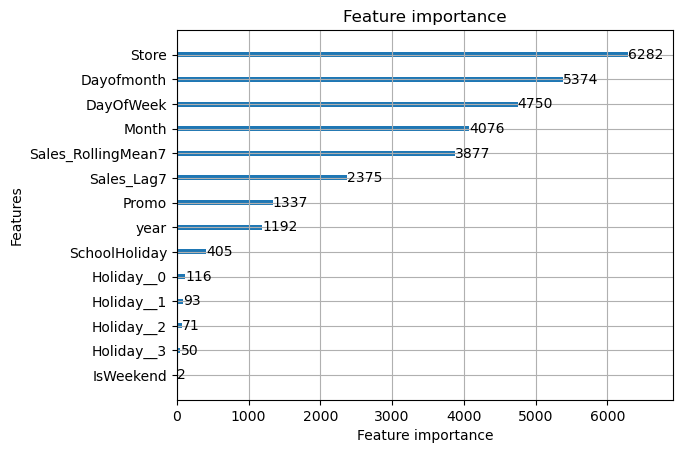

In [47]:
lgb.plot_importance(model, max_num_features=20)
plt.show()


In [48]:
# LightGBM Best Params
lgb_best_params = {
    'n_estimators': 912,
    'learning_rate': 0.09152775175207041,
    'max_depth': 12,
    'subsample': 0.7162382980855135,
    'colsample_bytree': 0.8452941625377381,
    'reg_alpha': 0.060372934288133166,
    'reg_lambda': 0.010628399939463734
}

# XGBoost Best Params
xgb_best_params = {
    'n_estimators': 942,
    'learning_rate': 0.034804494629440456,
    'max_depth': 11,
    'subsample': 0.8659017498930301,
    'colsample_bytree': 0.808380210344425,
    'reg_alpha': 0.05943696602206666,
    'reg_lambda': 0.02529481052708836
}

# Train LightGBM model
lgb_model = LGBMRegressor(**lgb_best_params)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
lgb_rmse = mean_squared_error(y_test, y_pred_lgb, squared=False)
print(f"LightGBM RMSE: {lgb_rmse:.5f}")

# Train XGBoost model
xgb_model = XGBRegressor(**xgb_best_params)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)
print(f"XGBoost RMSE: {xgb_rmse:.5f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 810942, number of used features: 14
[LightGBM] [Info] Start training from score 8.756742


C:\Users\abhishek maurya\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


LightGBM RMSE: 0.12873
XGBoost RMSE: 0.12863


C:\Users\abhishek maurya\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [49]:
import joblib

best_params = {
    'n_estimators': 912,
    'learning_rate': 0.09152775175207041,
    'max_depth': 12,
    'subsample': 0.7162382980855135,
    'colsample_bytree': 0.8452941625377381,
    'reg_alpha': 0.060372934288133166,
    'reg_lambda': 0.010628399939463734
}
X_full = pd.concat([X_train, X_test], axis=0)
y_full = pd.concat([y_train, y_test], axis=0)


# Model retrain
final_model = LGBMRegressor(**best_params)   
final_model.fit(X_full, y_full)   

# Save model
joblib.dump(final_model, 'STORE-WISE.pkl')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 844392, number of used features: 14
[LightGBM] [Info] Start training from score 8.758421


['STORE-WISE.pkl']